<a href="https://colab.research.google.com/github/taruun0823/test_machinelearning/blob/main/wholesales_kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls

sample_data


In [3]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Jun 15 13:37 sample_data


In [4]:
!pwd

/content


In [5]:
!ls -l ./sample_data

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Jun 15 13:37 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Jun 15 13:37 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Jun 15 13:37 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Jun 15 13:37 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [7]:
!ls -l ./

total 20
drwxr-xr-x 1 root root  4096 Jun 15 13:37  sample_data
-rw-r--r-- 1 root root 15021 Jul  2 04:47 'Wholesale customers data.csv'


In [9]:
import pandas as pd
pd.read_csv('./Wholesale customers data.csv')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [10]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
df = pd.DataFrame(mydict)
df

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


In [11]:
df.iloc[0]

a    1
b    2
c    3
d    4
Name: 0, dtype: int64

In [12]:
df.iloc[1,2]

300

In [13]:
df.iloc[1:2, 2:3]

,c
1,300


In [14]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [15]:
df.loc['cobra']

max_speed    1
shield       2
Name: cobra, dtype: int64

In [16]:
df = pd.read_csv('./Wholesale customers data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
X=df.iloc[:, :]

In [18]:
X.shape

(440, 8)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
from sklearn import cluster
kmeans =cluster.KMeans(n_clusters=5)

In [27]:
kmeans.fit(X)
kmeans.labels_


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 4, 0, 1, 1, 1, 0, 4, 0, 1, 0, 1, 0,
       1, 4, 1, 1, 0, 1, 4, 3, 1, 0, 1, 1, 0, 0, 1, 4, 4, 3, 1, 1, 4, 4,
       0, 4, 4, 2, 0, 4, 0, 0, 3, 4, 1, 0, 4, 4, 0, 0, 0, 2, 0, 4, 0, 2,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 4, 0, 0, 0, 4, 0, 1, 0, 2, 2, 3,
       0, 1, 0, 0, 4, 1, 4, 0, 0, 0, 0, 0, 4, 4, 0, 3, 1, 1, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 3, 1, 1, 0, 3, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 4, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 4, 4, 1, 0, 4, 0, 0, 1, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       3, 0, 0, 0, 0, 3, 4, 3, 0, 0, 0, 0, 4, 4, 1, 0, 0, 4, 0, 1, 1, 0,
       0, 0, 4, 4, 1, 0, 0, 4, 0, 0, 0, 4, 1, 2, 0, 0, 0, 4, 4, 1, 4, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 1, 1,
       1, 0, 0, 4, 0, 0, 1, 0, 0, 4, 0, 1, 0, 1, 0, 0, 3, 3, 0, 0, 1, 0,
       4, 4, 4, 1, 4, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 3, 1, 3, 3,
       0, 1, 1, 3, 0, 0, 0, 4, 1, 0, 1, 0, 0, 0, 1,

In [29]:
df['label']=kmeans.labels_
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,3
437,2,3,14531,15488,30243,437,14841,1867,4
438,1,3,10290,1981,2232,1038,168,2125,0


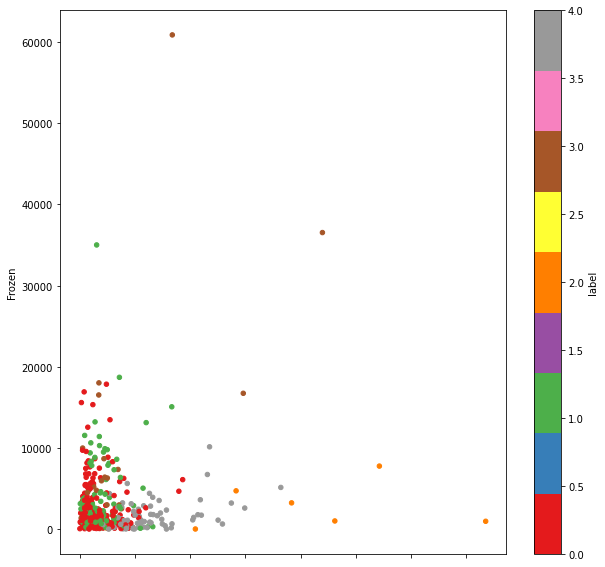

In [31]:
df.plot(kind= 'scatter',x='Milk', y='Frozen', c='label', cmap='Set1',figsize=(7,7))

In [32]:
dfx =df[-((df['label']==0) | (df['label']==4))]
df.shape, dfx.shape

((440, 9), (135, 9))

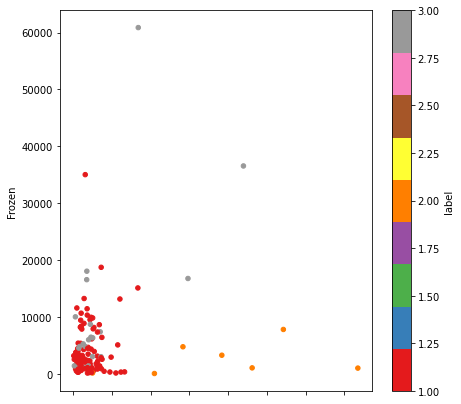

In [33]:
dfx.plot(kind= 'scatter',x='Milk', y='Frozen', c='label', cmap='Set1',figsize=(7,7))

In [35]:
df.to_excel('./wholesale.xls')